In [6]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.

import pandas as pd
import numpy as np

# Sample dataset with missing values, duplicates, and outliers
data = {
    'Age': [25, 30, np.nan, 40, 150, 60, 22, 1000, 30, 25],
    'Salary': [50000, 60000, 55000, 70000, 1000000, 75000, 80000, 100000, 60000, 50000],
    'Experience': [1, 2, 3, 4, 50, 6, 1, 100, np.nan, 2]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Display the original dataset
print("Original DataFrame:")
print(df)

# Step 1: Handle Missing Values
def handle_missing_values(df):
    # Fill numeric columns with the mean
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Experience'] = df['Experience'].fillna(df['Experience'].mean())
    
    # Fill categorical columns (if any) with the mode (not applicable here)
    # Example: df['Column_Name'] = df['Column_Name'].fillna(df['Column_Name'].mode()[0])
    
    return df

# Step 2: Remove Duplicates
def remove_duplicates(df):
    df = df.drop_duplicates()  # Remove duplicate rows based on all columns
    return df

# Step 3: Handle Outliers using IQR method
def handle_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:  # Process only numeric columns
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median of the respective column
        df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)
    
    return df

# Step 4: Apply all data cleaning steps
def clean_data(df):
    # Handle missing values
    df = handle_missing_values(df)
    
    # Remove duplicates
    df = remove_duplicates(df)
    
    # Handle outliers
    df = handle_outliers(df)
    
    return df

# Clean the dataset
cleaned_df = clean_data(df)

# Display the cleaned dataset
print("\nCleaned DataFrame:")
print(cleaned_df)


Original DataFrame:
      Age   Salary  Experience
0    25.0    50000         1.0
1    30.0    60000         2.0
2     NaN    55000         3.0
3    40.0    70000         4.0
4   150.0  1000000        50.0
5    60.0    75000         6.0
6    22.0    80000         1.0
7  1000.0   100000       100.0
8    30.0    60000         NaN
9    25.0    50000         2.0

Cleaned DataFrame:
          Age    Salary  Experience
0   25.000000   50000.0    1.000000
1   30.000000   60000.0    2.000000
2  153.555556   55000.0    3.000000
3   40.000000   70000.0    4.000000
4  150.000000   65000.0    3.500000
5   60.000000   75000.0    6.000000
6   22.000000   80000.0    1.000000
7   35.000000  100000.0    3.500000
8   30.000000   60000.0   18.777778
9   25.000000   50000.0    2.000000


Original DataFrame:
    Age  Salary
0    25   50000
1    30   60000
2    35   70000
3    40   80000
4    45   90000
5    50  100000
6    55  110000
7    60  120000
8    65  130000
9  1000  140000

Skewness before transformation:
Age       3.151468
Salary    0.000000
dtype: float64

Skewness after transformation:
Age        3.151468
Salary     0.000000
Age_log    2.670283
dtype: float64


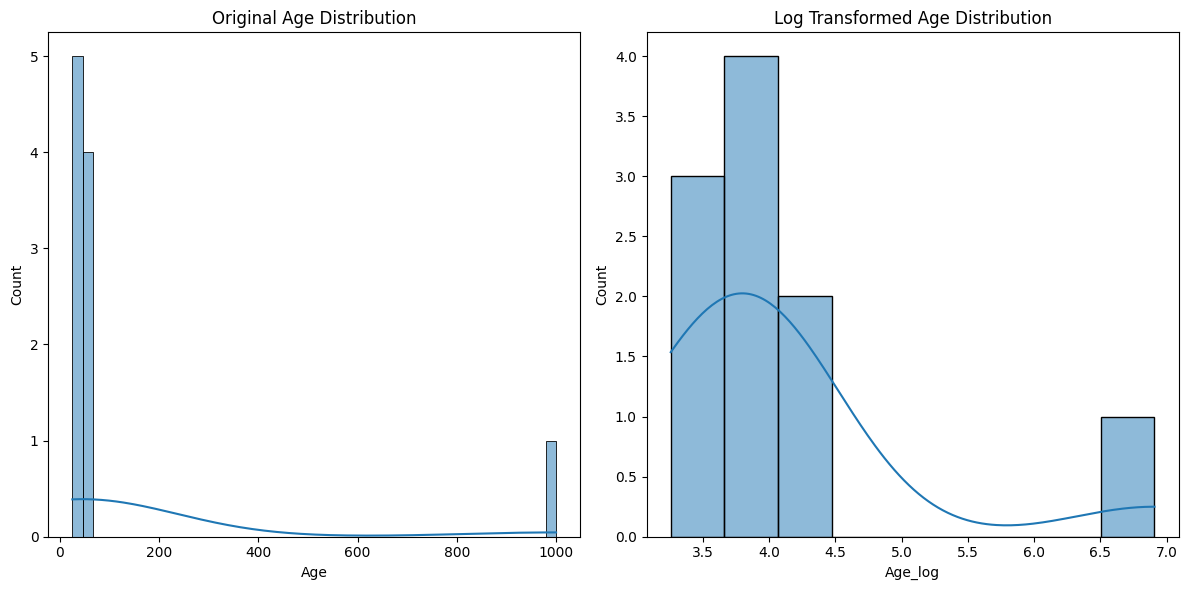


Transformed DataFrame:
    Age  Salary   Age_log
0    25   50000  3.258097
1    30   60000  3.433987
2    35   70000  3.583519
3    40   80000  3.713572
4    45   90000  3.828641
5    50  100000  3.931826
6    55  110000  4.025352
7    60  120000  4.110874
8    65  130000  4.189655
9  1000  140000  6.908755


In [7]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 1000],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

print("\nSkewness before transformation:")
print(df.skew())

df['Age_log'] = np.log1p(df['Age'])

print("\nSkewness after transformation:")
print(df.skew())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Age_log'], kde=True)
plt.title('Log Transformed Age Distribution')

plt.tight_layout()
plt.show()

print("\nTransformed DataFrame:")
print(df)


In [8]:


# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.
import pandas as pd

# Sample dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 1000],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original dataset
print("Original DataFrame:")
print(df)

# Creating a new feature: Age_Salary_Ratio
df['Age_Salary_Ratio'] = df['Age'] / df['Salary']

# Display the new dataset with the additional feature
print("\nDataFrame with New Feature 'Age_Salary_Ratio':")
print(df)


Original DataFrame:
    Age  Salary
0    25   50000
1    30   60000
2    35   70000
3    40   80000
4    45   90000
5    50  100000
6    55  110000
7    60  120000
8    65  130000
9  1000  140000

DataFrame with New Feature 'Age_Salary_Ratio':
    Age  Salary  Age_Salary_Ratio
0    25   50000          0.000500
1    30   60000          0.000500
2    35   70000          0.000500
3    40   80000          0.000500
4    45   90000          0.000500
5    50  100000          0.000500
6    55  110000          0.000500
7    60  120000          0.000500
8    65  130000          0.000500
9  1000  140000          0.007143


In [9]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.


import pandas as pd
import numpy as np
from scipy import stats

# Sample dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 1000],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Z-scores for the 'Age' column
z_scores = stats.zscore(df['Age'])

# Identify outliers with Z-score greater than 3 or less than -3
outliers = np.where(np.abs(z_scores) > 3)

# Print outliers' indices
print("Indices of outliers:", outliers[0])

# Handle outliers: Replace outliers with the median of the column
median_age = df['Age'].median()
df['Age'] = np.where(np.abs(z_scores) > 3, median_age, df['Age'])

# Display the DataFrame after handling outliers
print("\nDataFrame after handling outliers:")
print(df)


Indices of outliers: []

DataFrame after handling outliers:
      Age  Salary
0    25.0   50000
1    30.0   60000
2    35.0   70000
3    40.0   80000
4    45.0   90000
5    50.0  100000
6    55.0  110000
7    60.0  120000
8    65.0  130000
9  1000.0  140000


In [10]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.


import pandas as pd
from sklearn.impute import KNNImputer

# Sample dataset with missing values
data = {
    'Age': [25, 30, 35, 40, None, 50, 55, None, 65, 70],
    'Salary': [50000, 60000, 70000, 80000, 90000, None, 110000, 120000, None, 140000],
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original dataset
print("Original DataFrame with Missing Values:")
print(df)

# Initialize KNNImputer with 3 neighbors
imputer = KNNImputer(n_neighbors=3)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the DataFrame after imputation
print("\nDataFrame After KNN Imputation:")
print(df_imputed)


Original DataFrame with Missing Values:
    Age    Salary
0  25.0   50000.0
1  30.0   60000.0
2  35.0   70000.0
3  40.0   80000.0
4   NaN   90000.0
5  50.0       NaN
6  55.0  110000.0
7   NaN  120000.0
8  65.0       NaN
9  70.0  140000.0

DataFrame After KNN Imputation:
         Age         Salary
0  25.000000   50000.000000
1  30.000000   60000.000000
2  35.000000   70000.000000
3  40.000000   80000.000000
4  43.333333   90000.000000
5  50.000000   86666.666667
6  55.000000  110000.000000
7  55.000000  120000.000000
8  65.000000  110000.000000
9  70.000000  140000.000000
